# First Experiments: No Data Augmentation
* 3 base models
* Std_Norm
* No data augmentatition
* MSE

**Measures**:
* **Val loss TRAIN**
* **Test MSE**
* **Test PSNR**
* **Test SSIM**
* **Cualitative: show reconstruction, normal and with augmentation**


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Without-DataAugmentation" data-toc-modified-id="Without-DataAugmentation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Without DataAugmentation</a></span><ul class="toc-item"><li><span><a href="#MSE-LOSS" data-toc-modified-id="MSE-LOSS-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>MSE LOSS</a></span><ul class="toc-item"><li><span><a href="#Quantitative" data-toc-modified-id="Quantitative-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Quantitative</a></span><ul class="toc-item"><li><span><a href="#Training-and-validation" data-toc-modified-id="Training-and-validation-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Training and validation</a></span></li><li><span><a href="#Test-set" data-toc-modified-id="Test-set-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>Test set</a></span></li></ul></li><li><span><a href="#Qualitative-(How-it-reconstruct)---Only-in-Test" data-toc-modified-id="Qualitative-(How-it-reconstruct)---Only-in-Test-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Qualitative (How it reconstruct) - Only in Test</a></span><ul class="toc-item"><li><span><a href="#From-'clean'-images" data-toc-modified-id="From-'clean'-images-1.1.2.1"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>From 'clean' images</a></span></li><li><span><a href="#From-corrupted-inputs" data-toc-modified-id="From-corrupted-inputs-1.1.2.2"><span class="toc-item-num">1.1.2.2&nbsp;&nbsp;</span>From corrupted inputs</a></span></li></ul></li></ul></li></ul></li></ul></div>

https://towardsdatascience.com/building-a-resnet-in-keras-e8f1322a49ba

In [1]:
import glob
import os

## Without DataAugmentation

### MSE LOSS
#### Quantitative

* **PSNR**
$$PSNR=10\times \log_{10}\frac{peakval^2}{MSE(x,y)}$$
* **DSSIM**
$$Structural Dissimilarity = DSSIM = \frac{1-SSIM(x,y)}{2}$$


##### Training and validation

In [2]:
from create_test_report import TestMetricWrapper
model_folders = glob.glob('results/No_Data_Aug/*')
model_folders  = [mf for mf in model_folders if 'qualitative' not in mf]
TEST_img_PATH = '..'+os.path.sep+'IXI-T1'+os.path.sep+'PNG'+os.path.sep+'test_folder'+os.path.sep+'test'
test_img_files = glob.glob(TEST_img_PATH+os.path.sep+'*.png')

In [3]:
noaug_mse_test_metrics = TestMetricWrapper(model_folders,test_img_files)
_,_ = noaug_mse_test_metrics.get_training_df()
noaug_mse_test_metrics.get_min_validation_loss_df()

,Val_loss,Epoch
skip_con_cae_MSE_NoKReg_NoPlat,0.0000110335,32.0
small_res_cae_MSE_full_pre_NoKReg_NoPlat,0.0000392472,22.0
small_res_cae_MSE_full_pre_L2KReg_LRPlat,0.0001097200,75.0
small_res_cae_MSE_original_NoKReg_NoPlat,0.0001111093,21.0
myronenko_cae_MSE_NoKReg_NoPlat,0.0001839338,8.0
myronenko_cae_MSE_L2KReg_NoPlat,0.0014740063,27.0


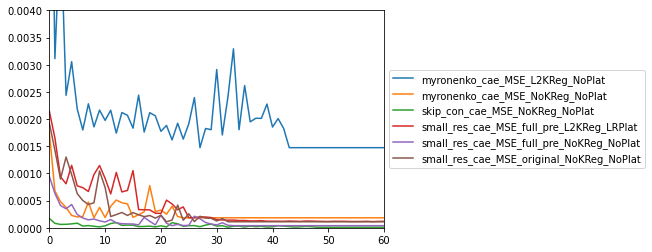

In [4]:
noaug_mse_test_metrics.plot_val_loss(ylimit = 0.004, epochs=60)

##### Test set

***Method for getting metrics with keras_evaluate***: *WARN: Metric for models with L2reg add some variation due to L2 in loss*.
```python
na_mse_kers_df = noaug_mse_test_metrics.get_keras_evaluation(return_type='df', verbose=2)
na_mse_kers_df
```

In [5]:
na_mse_custom_df = noaug_mse_test_metrics.get_custom_evaluation(return_type='df', verbose=True)
na_mse_custom_df.sort_values('mse_mean')

myronenko_cae_MSE_L2KReg_NoPlat - MSE: 1.27e-03+-4.56e-04 - DSSIM: 4.40e-02+-8.48e-03 - PSNR: 2.93e+01+-1.74e+00

myronenko_cae_MSE_NoKReg_NoPlat - MSE: 1.81e-04+-6.26e-05 - DSSIM: 5.59e-03+-2.65e-03 - PSNR: 3.77e+01+-1.60e+00

skip_con_cae_MSE_NoKReg_NoPlat - MSE: 1.07e-05+-2.74e-06 - DSSIM: 1.04e-03+-3.50e-04 - PSNR: 4.98e+01+-1.04e+00

small_res_cae_MSE_full_pre_L2KReg_LRPlat - MSE: 8.56e-05+-3.13e-05 - DSSIM: 4.90e-03+-6.07e-04 - PSNR: 4.10e+01+-1.67e+00

small_res_cae_MSE_full_pre_NoKReg_NoPlat - MSE: 3.82e-05+-1.28e-05 - DSSIM: 2.64e-03+-1.13e-03 - PSNR: 4.44e+01+-1.32e+00

small_res_cae_MSE_original_NoKReg_NoPlat - MSE: 1.09e-04+-2.82e-05 - DSSIM: 1.40e-02+-1.70e-03 - PSNR: 3.97e+01+-1.11e+00



,mse_mean,mse_std,dssim_mean,dssim_std,psnr_mean,psnr_std
myronenko_cae_MSE_L2KReg_NoPlat,0.0012732592,0.0004555621,0.0440321714,0.0084767612,29.2681961060,1.7376770973
myronenko_cae_MSE_NoKReg_NoPlat,0.0001810452,0.0000626195,0.0055861413,0.0026477883,37.7001762390,1.6004165411
skip_con_cae_MSE_NoKReg_NoPlat,0.0000106700,0.0000027366,0.0010373810,0.0003500466,49.8474464417,1.0438611507
small_res_cae_MSE_full_pre_L2KReg_LRPlat,0.0000855566,0.0000313414,0.0048950911,0.0006073628,40.9822654724,1.6682237387
small_res_cae_MSE_full_pre_NoKReg_NoPlat,0.0000381837,0.0000127801,0.0026404802,0.0011335553,44.3861808777,1.3171603680
small_res_cae_MSE_original_NoKReg_NoPlat,0.0001094501,0.0000282342,0.0140299667,0.0017024264,39.7480773926,1.1057847738


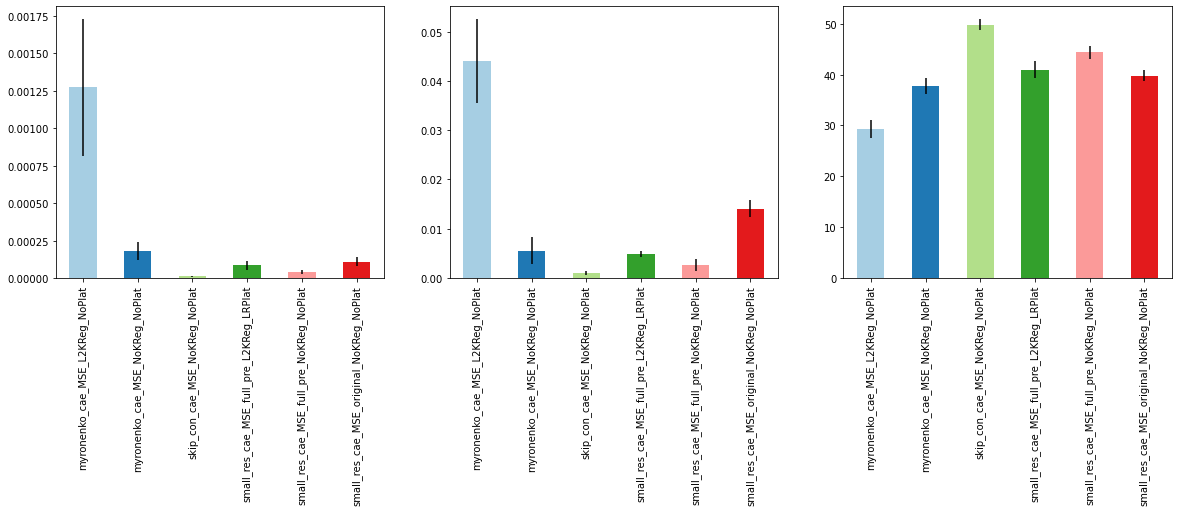

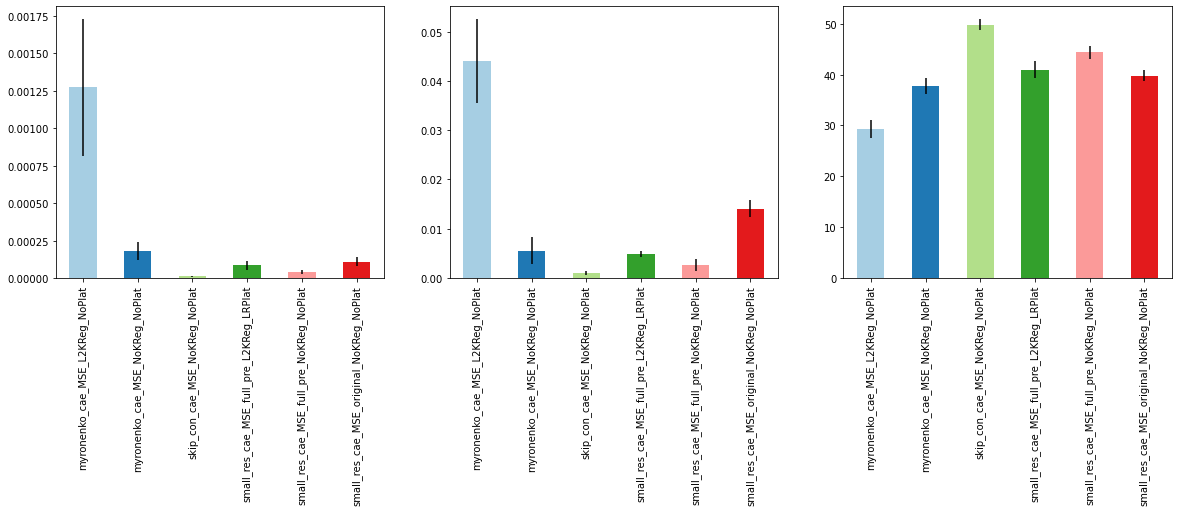

In [6]:
no_aug_mse_plot = noaug_mse_test_metrics.plot_custom_metrics()

#### Qualitative (How it reconstruct) - Only in Test
##### From 'clean' images
How the models reconstruct unmodified input MRIs?

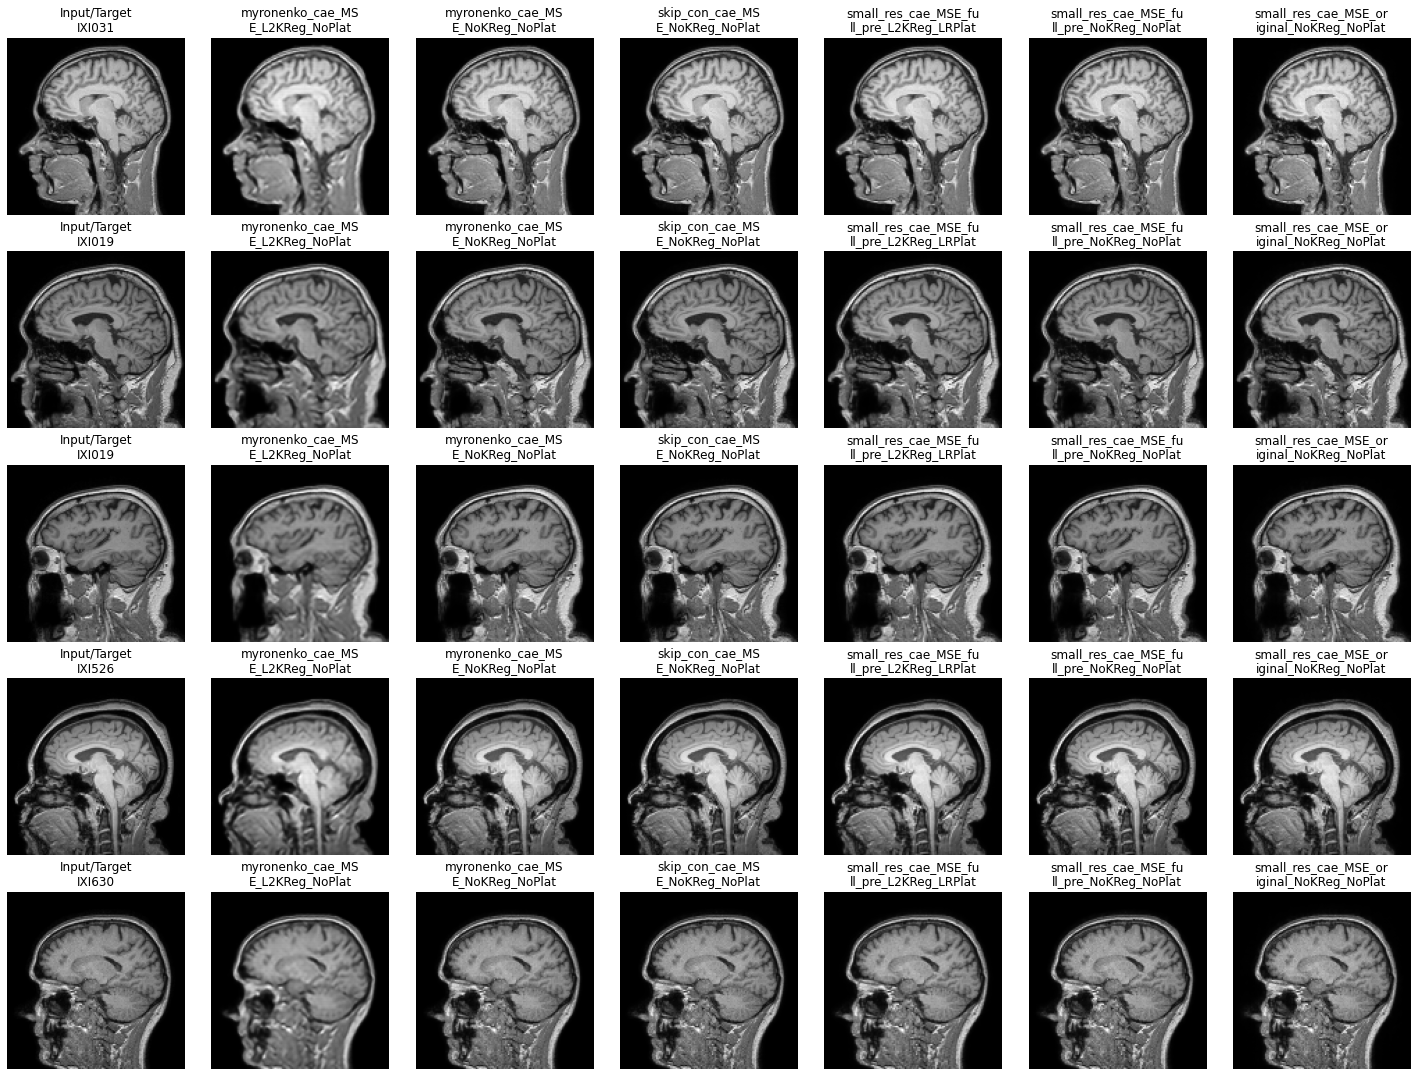

In [7]:
clear_mris = noaug_mse_test_metrics.plot_images(id_images = [183,75,6], n_random=2, figsize=(20,15))

##### From corrupted inputs

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [27]:
def parse_image(file_path):
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    # convert the compressed string to a 3D float tensor
    img = tf.io.decode_png(img, channels=1)
    img = tf.image.convert_image_dtype(img, tf.float32)

    img = tf.image.resize(img, (128,128))

    #min_max_sacler_norm
    img = tf.math.divide(tf.math.subtract(img, tf.math.reduce_min(img)),
                         tf.math.subtract(tf.math.reduce_max(img), tf.math.reduce_min(img)))
    #std_norm
    #img = tf.math.divide(tf.math.subtract(img, tf.math.reduce_mean(img)),tf.math.reduce_std(img))
    return img, tf.identity(img)

In [28]:
ds = tf.data.Dataset.from_tensor_slices(test_img_files)
AUTOTUNE = tf.data.experimental.AUTOTUNE
ds = ds.map(parse_image, num_parallel_calls=AUTOTUNE)
ds = ds.repeat()
ds = ds.batch(8)
ds = ds.prefetch(buffer_size=AUTOTUNE)

In [42]:
mpl.rcParams['image.cmap'] = 'gray'

In [43]:
batchx, batchy = next(iter(ds))

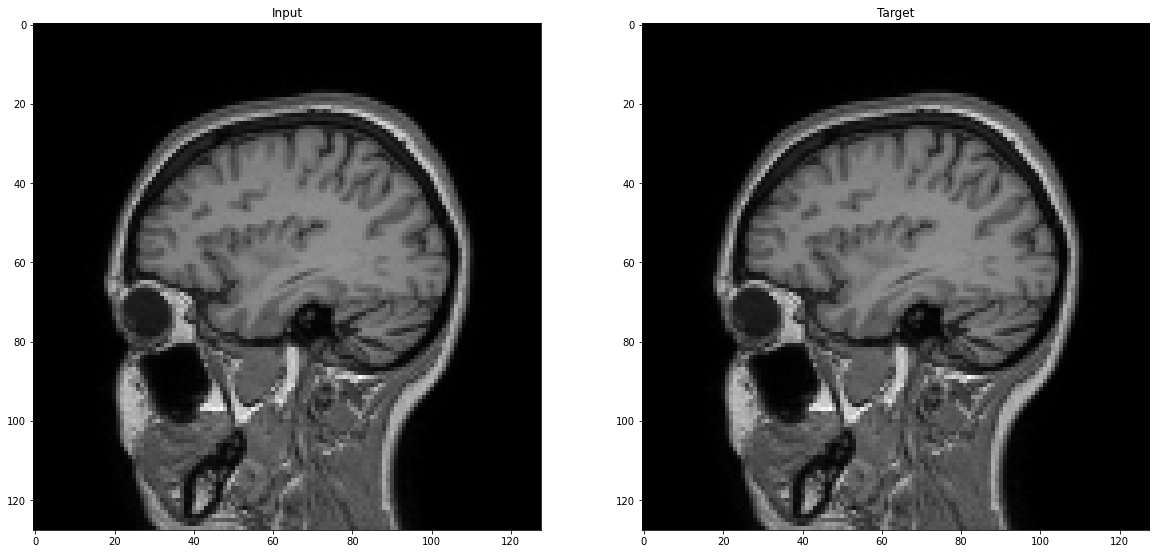

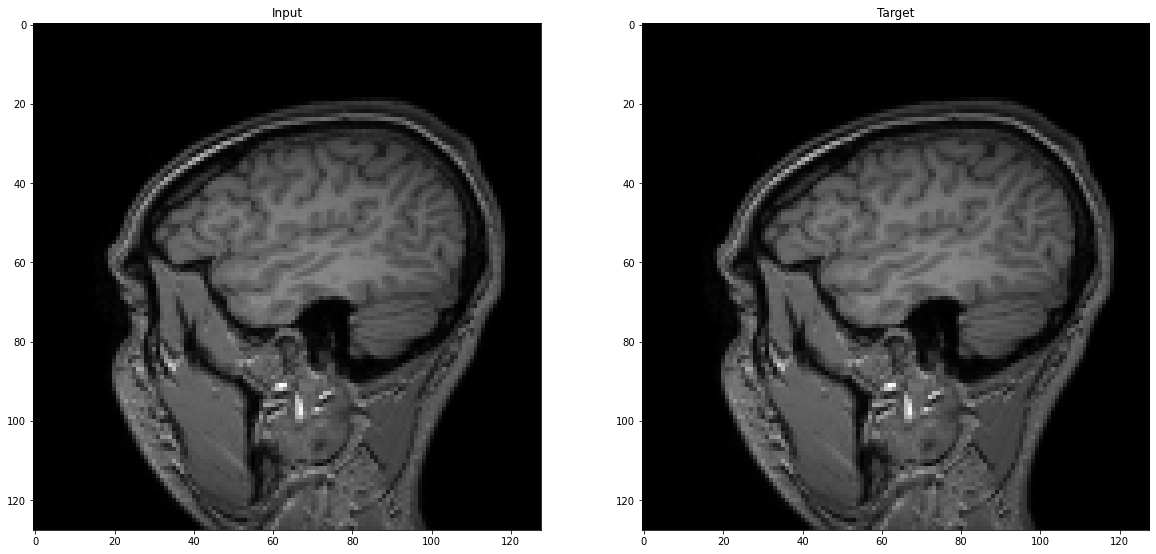

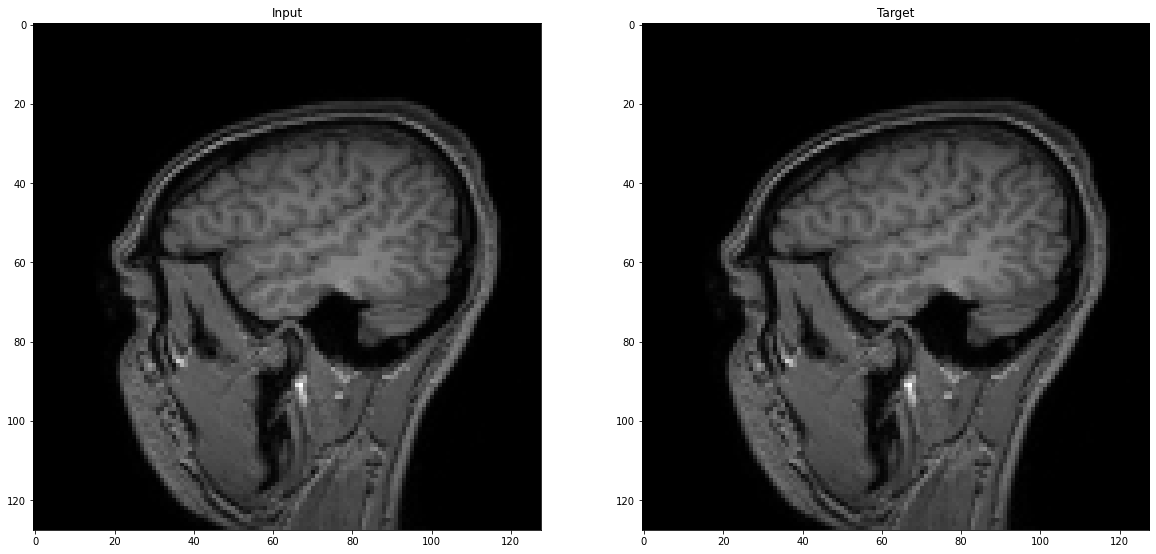

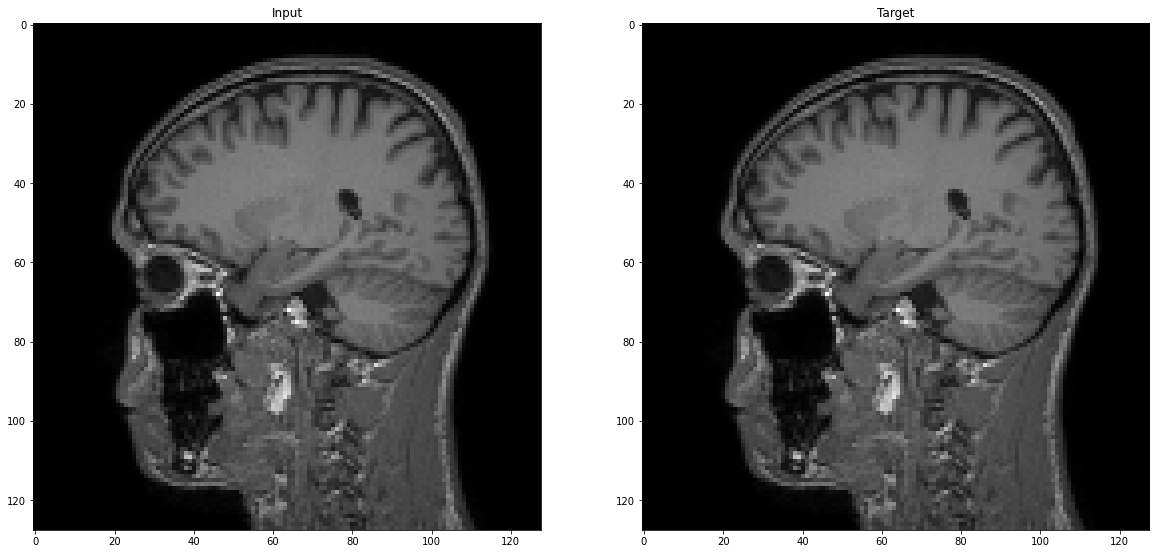

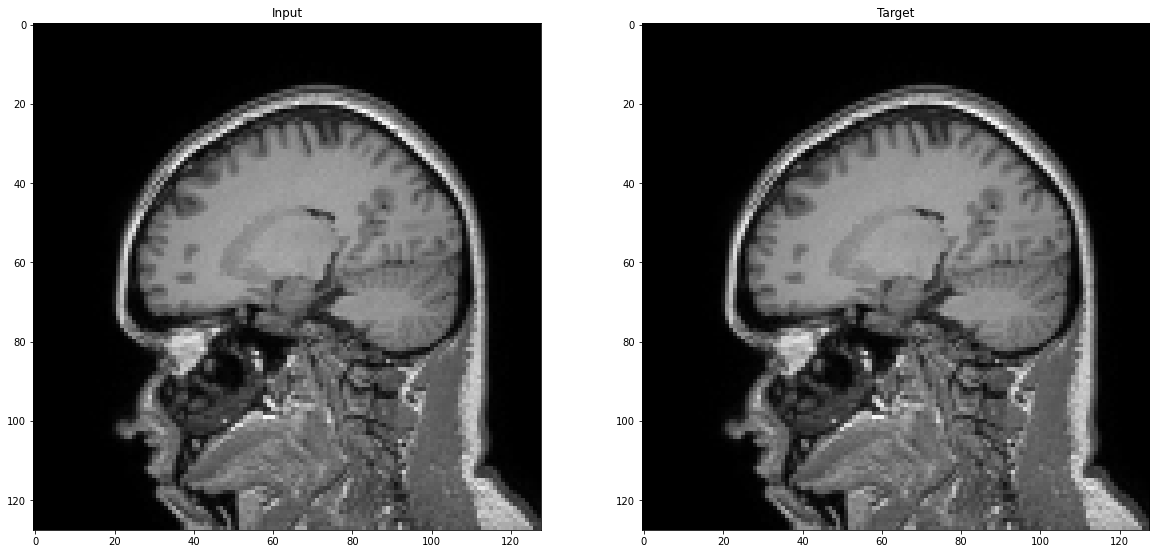

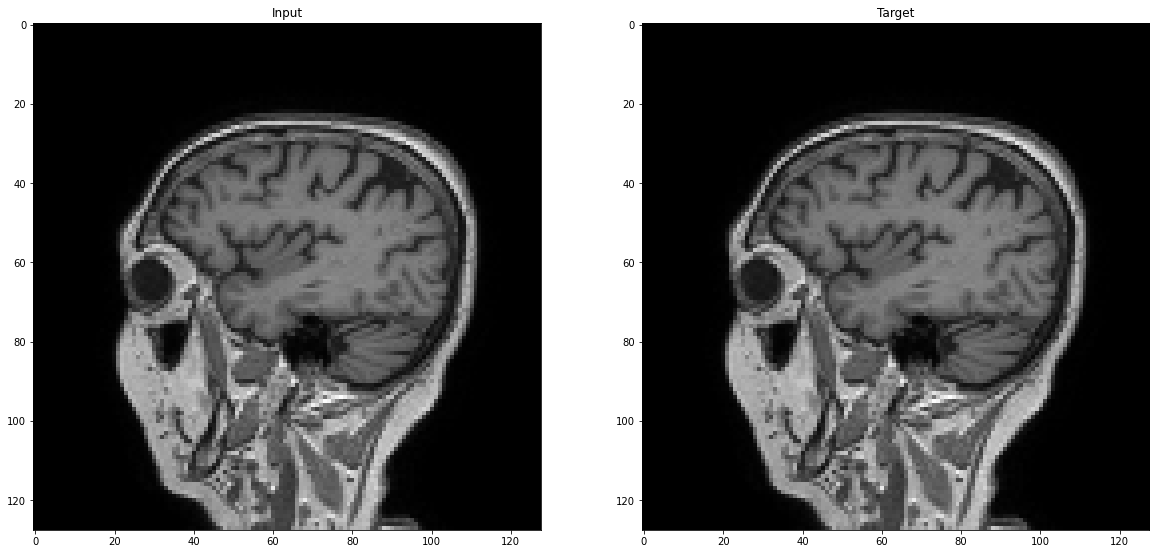

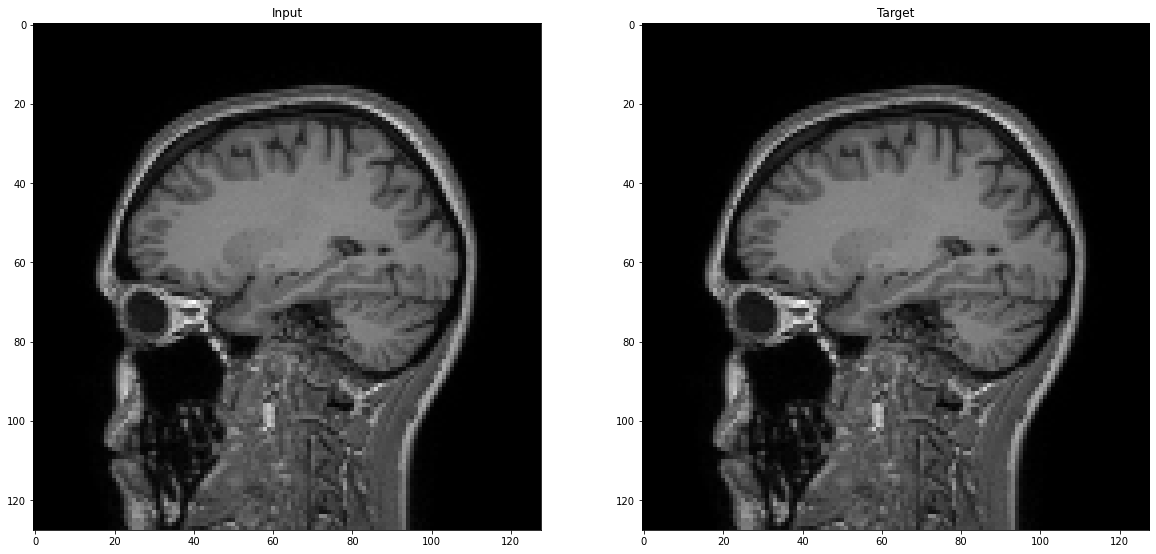

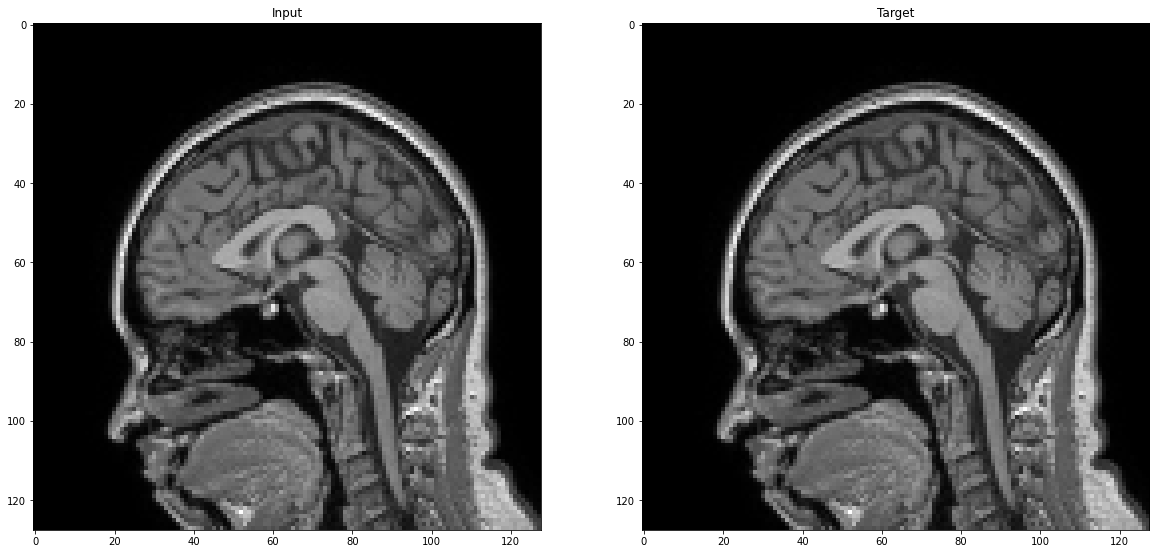

In [46]:
for x,y in zip(batchx, batchy):
    plt.figure(figsize=(20,15))
    plt.subplot(1,2,1)
    plt.imshow(x)
    plt.title('Input')
    plt.subplot(1,2,2)
    plt.imshow(y)
    plt.title('Target')
    plt.show()